In [ ]:
import re
from collections import defaultdict

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
punct = "!\"#$%&'()*+,-./:;<=>?@[\\]^_{|}~—"

# Функция для подготовки текста к исследованию
def clear_text(text):
    # понижаем регистр
    text = text.lower()
    # удаляем знаки препинания, лишние символы, пробелы на конце и в начале строки, символы переноса строки.
    return text.translate(str.maketrans("", "", punct)).replace("\n", " ").strip()

In [ ]:
# Гамаюн дял проверки программы

text = """
На` гла`дях бесконе`чных во`д,
Зака`том в пу`рпур облече`нных,
Она` веща`ет и поё`т,
Не` в си`лах кры`л подня`ть смяте`нных.
Веща`ет и`го злы`х тата`р,
Веща`ет ка`зней ря`д крова`вых,
И тру`с, и го`лод, и пожа`р,
Злоде`ев си`лу, ги`бель пра`вых...
Предве`чным у`жасом объя`т,
Прекра`сный ли`к гори`т любо`вью,
Но` веще`й пра`вдою звуча`т
Уста`, запё`кшиеся кро`вью!..
"""
text = clear_text(text)
text

'на` гла`дях бесконе`чных во`д зака`том в пу`рпур облече`нных она` веща`ет и поё`т не` в си`лах кры`л подня`ть смяте`нных веща`ет и`го злы`х тата`р веща`ет ка`зней ря`д крова`вых и тру`с и го`лод и пожа`р злоде`ев си`лу ги`бель пра`вых предве`чным у`жасом объя`т прекра`сный ли`к гори`т любо`вью но` веще`й пра`вдою звуча`т уста` запё`кшиеся кро`вью'

In [ ]:
# Исследуемый текст

text = """
Отвори`те мне` темни`цу,
Дади`те мне` сия`нье дня`,
Черногла`зую деви`цу,
Черногри`вого коня`.

Я краса`вицу мла`дую
Пре`жде сла`дко поцелу`ю,
На коня` пото`м вскочу`,
В степь, как ве`тер, улечу`.

Но окно` тюрьмы` высо`ко,
Дверь тяжёлая с замко`м;
Черноо`кая дале`ко,
В пы`шном те`реме свои`м;

Добрый конь в зелёном по`ле
Без узды`, оди`н, по во`ле
Ска`чет, весел и игри`в,
Хвост по ве`тру распусти`в...

Оди`нок я - нет отра`ды:
Сте`ны го`лые кругом`,
Ту`скло све`тит луч лампа`ды
Умира`ющим огнём`;

То`лько слы`шно: за дверя`ми
Зву`чно-ме`рными шага`ми
Хо`дит в ти`шине ночно`й
Безотве`тный часово`й.
"""
text = clear_text(text)
text

'отвори`те мне` темни`цу дади`те мне` сия`нье дня` черногла`зую деви`цу черногри`вого коня`  я краса`вицу мла`дую пре`жде сла`дко поцелу`ю на коня` пото`м вскочу` в степь как ве`тер улечу`  но окно` тюрьмы` высо`ко дверь тяжёлая с замко`м черноо`кая дале`ко в пы`шном те`реме свои`м  добрый конь в зелёном по`ле без узды` оди`н по во`ле ска`чет весел и игри`в хвост по ве`тру распусти`в  оди`нок я  нет отра`ды сте`ны го`лые кругом` ту`скло све`тит луч лампа`ды умира`ющим огнём`  то`лько слы`шно за дверя`ми зву`чноме`рными шага`ми хо`дит в ти`шине ночно`й безотве`тный часово`й'

In [ ]:
# создаем и заполняем словарь
df = defaultdict(int)
glasn = "оаяеёиуюыей"

for word in text.split():
    # first = True;
    for i, char in enumerate(word):
        if char in glasn:
            df[char] += 1
            # if first:   # повышающий коэф для первого звука
            #   df[char] += 3
        elif char == "`":
            df[word[i - 1]] += 1 # повышающий коэф для ударной буквы
        # first = False

# группирование звуков
df["и"] += df["й"] / 2
df["а"] += df["я"]
df["у"] += df["ю"]
df["е"] += df["ё"] / 2
df["о"] += df["ё"] / 2

del df["й"], df["я"], df["ю"], df["ё"]#, df["м"]

# переименование и упорядочивание колонок
df['О+0.5Ё'] = df.pop("о")
df['А+Я'] = df.pop("а")
df['Е+0.5Ё'] = df.pop("е")
df['И+0.5Й'] = df.pop("и")
df['У+Ю'] = df.pop("у")
df['Ы'] = df.pop("ы")

df

defaultdict(int,
            {'О+0.5Ё': 27.0,
             'А+Я': 46,
             'Е+0.5Ё': 31.0,
             'И+0.5Й': 18.5,
             'У+Ю': 14,
             'Ы': 11})

In [ ]:
# считаем количество букв в тексте
R = len(text.replace("`", "").replace(" ", ""))
R

255

In [ ]:
# строим таблицу по формулам

# нормальные значения частоты (из таблицы в презентации)
df = pd.DataFrame({"n": df,
                    "Pn": {'О+0.5Ё': 0.126,
                           'А+Я': 0.116,
                           'Е+0.5Ё': 0.102,
                           'И+0.5Й': 0.077,
                           'У+Ю': 0.040,
                           'Ы': 0.024}
                    })
# выведенные значения частоты
df["Pi"] = df["n"]/R
df = df[["n", "Pi", "Pn"]]
# сравнение Pi c Pn
df["sig"] = np.sqrt(df["Pn"]*(1-df["Pn"])/R)
# сила цвета
df["z"] = (df["Pi"] - df["Pn"]) / df["sig"]
df = df.round(decimals=3)
df

,n,Pi,Pn,sig,z
О+0.5Ё,27.0,0.106,0.126,0.021,-0.968
А+Я,46.0,0.180,0.116,0.020,3.211
Е+0.5Ё,31.0,0.122,0.102,0.019,1.033
И+0.5Й,18.5,0.073,0.077,0.017,-0.267
У+Ю,14.0,0.055,0.040,0.012,1.214
Ы,11.0,0.043,0.024,0.010,1.997


In [ ]:
# отбрасываем отрицательные значения, сортируем по убыванию Z
df1 = df[df.z > 0]
df1 = df1.sort_values(by=['z'], ascending=False)
df1

,n,Pi,Pn,sig,z
А+Я,46.0,0.180,0.116,0.020,3.211
Ы,11.0,0.043,0.024,0.010,1.997
У+Ю,14.0,0.055,0.040,0.012,1.214
Е+0.5Ё,31.0,0.122,0.102,0.019,1.033


In [ ]:
df1.index

Index(['А+Я', 'Ы', 'У+Ю', 'Е+0.5Ё'], dtype='object')

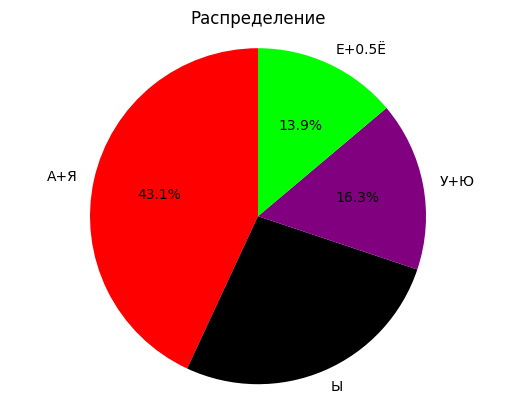

In [ ]:
import matplotlib.pyplot as plt

# построение круговой диаграммы
fig, ax = plt.subplots()

# Подготовка данных
sizes = df1["z"].values
labels = df1.index

# Словарь цветов по буквам
color_map = {
    'У+Ю': [128/255, 0, 128/255],  # фиолетовый
    'А+Я': [1, 0, 0],               # красный
    'И+0.5Й': [0, 0, 1],            # синий
    'Ы': [0, 0, 0],                 # черный
    'О+0.5Ё': [1, 1, 0],            # желтый
    'Е+0.5Ё': [0, 1, 0]             # зеленый
}
# Получаем цвета в порядке индексов
colors = [color_map[label] for label in df1.index]

# Создание круговой диаграммы
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',  # Показывать проценты
    startangle=90,      # Начальный угол
)

plt.axis('equal')  # Круг будет идеально круглым
plt.title('Распределение')
plt.show()